In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import svm
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import LabelEncoder,StandardScaler
#from scipy import ndimage
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc
from collections import Counter
%matplotlib inline
from sklearn import datasets, svm, metrics
#from sklearn.cluster import KMeans 
#from PIL import Image
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('zoo.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
#kmean_model= KMeans(n_clusters=4)
#kmean_model.fit()

In [6]:
unique,count=np.unique(data.class_type,return_counts=True)

In [7]:
unique

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [8]:
dict(zip(unique,count))

{1: 41, 2: 20, 3: 5, 4: 13, 5: 4, 6: 8, 7: 10}

In [9]:
X = data.drop('animal_name', axis = 1) 

In [10]:
X.fillna(method ='ffill', inplace = True) 

In [11]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [12]:
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

In [13]:
X_normalized = pd.DataFrame(X_normalized) 

In [14]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 

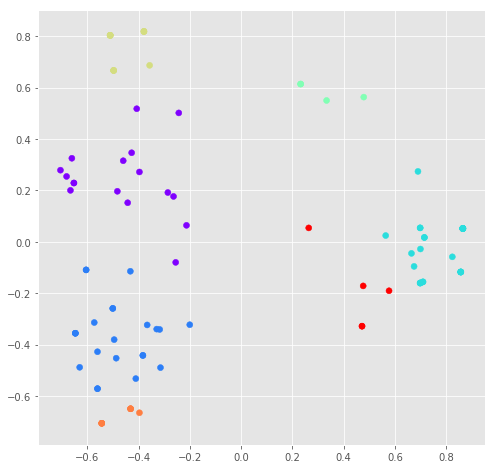

In [15]:
ac = AgglomerativeClustering(n_clusters=7)
plt.figure(figsize=(8,8))
plt.scatter(X_principal['P1'],X_principal['P2'],c=ac.fit_predict(X_principal),cmap='rainbow')

In [16]:
X_principal['label']=data.class_type

In [17]:
X_principal.head()

,P1,P2,label
0,0.698063,0.054345,1
1,0.856541,-0.117289,1
2,-0.511100,0.803429,4
3,0.698063,0.054345,1
4,0.864563,0.052030,1


In [20]:
predict= ac.fit_predict(X_principal)

In [21]:
metrics.mean_squared_error(data.class_type,predict)

2.4257425742574257